In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import heapq as h
import math
from math import sqrt

In [2]:
data = pd.read_csv("Dataset/Dataset.csv", sep=";", encoding = 'ISO-8859-1')
data.head(10)

,Distritos,X,Y
0,EL PRADO,-7.038042,-79.003317
1,NIEPOS,-6.926715,-79.131432
2,LA VICTORIA,-6.823756,-79.861147
3,SAÑA,-6.887142,-79.637997
4,ANDAJES,-10.777603,-76.927150
5,NAVAN,-10.857167,-77.046644
6,ANTONIO RAYMONDI,-10.203244,-77.499868
7,LA PRIMAVERA,-10.301866,-77.106289
8,PACLLON,-10.238924,-77.003412
9,SAN MIGUEL DE CORPANQUI,-10.291529,-77.209854


In [3]:
xp1 = (min(list(data['X'])), 0)
xp2 = (max(list(data['X'])), 1)

mx = (xp2[1] - xp1[1]) / (xp2[0] - xp1[0])
normalize_x = lambda x: mx * (x - xp1[0]) + xp1[1]

yp1 = (min(list(data['Y'])), 0)
yp2 = (max(list(data['Y'])), 1)

my = (yp2[1] - yp1[1]) / (yp2[0] - yp1[0])
normalize_y = lambda x: my * (x - yp1[0]) + yp1[1]


total_w = xp2[0] - xp1[0]
total_h = yp2[0] - yp1[0]

data['X'] = data['X'].map(normalize_x)
data['Y'] = data['Y'].map(normalize_y)

In [4]:
x = list(data['X'])
y = list(data['Y'])

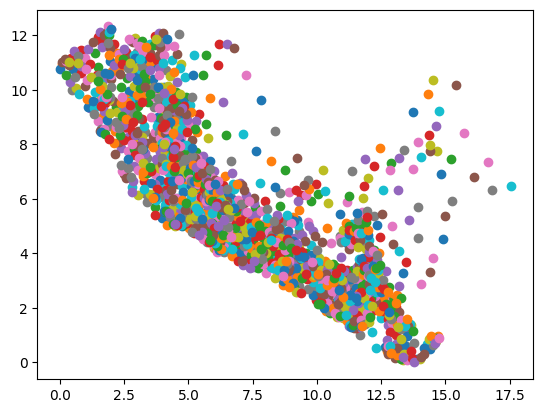

In [6]:
for (i,j) in zip(x, y):
  plt.scatter(i * total_w, j * total_h)
plt.show()

In [5]:
def prim(G):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    cost = [math.inf]*n

    cost[0] = 0
    q = [(0, 0)]
    while q:
        _, u = h.heappop(q)
        if visited[u]: continue
        visited[u] = True
        for v, w in G[u]:
            if not visited[v] and w < cost[v]:
                cost[v] = w
                path[v] = u
                h.heappush(q, (w, v))

    return path

In [9]:
vs = []

def euclidean_dist(row_a, row_b):
  return sqrt((row_a['X'] - row_b['X'])**2 + (row_a['Y'] - row_b['Y'])**2)

for index, (label, current) in enumerate(data.iterrows()):
  rowed = [(vi, euclidean_dist(current, v)) for vi, (_, v) in enumerate(data.iterrows())]
  rowed = sorted(rowed, key=lambda x: x[-1])[:15]
  vs += [rowed]
  

In [21]:
path = prim(vs)
print(path[:5])

[-1, 1066, 1762, 1765, 1281]


In [22]:

f = open("result.path", 'w')
f.write(' '.join(map(str, path)))

8250

In [17]:
print(path)

[-1, 1066, 1762, 1765, 1281, 1281, 1192, 1285, 1412, 640, 1290, 1254, 648, 649, 689, 1295, 1484, 18, 1484, 17, 288, 654, 33, 22, 1299, 28, 21, 656, 34, 30, 691, 21, 662, 1299, 660, 1474, 592, 1473, 1311, 606, 1777, 39, 40, 41, 1315, 1201, 1317, 1200, 675, 48, 1323, 1315, 967, 1215, 1827, 1620, 189, 189, 681, 1618, 1330, 105, 20, 695, 695, 1819, 67, 1819, 1346, 1343, 1342, 70, 705, 72, 75, 76, 706, 1256, 708, 80, 1352, 707, 76, 1575, 709, 1353, 710, 84, 712, 1351, 91, 86, 89, 1358, 93, 94, 1355, 714, 1361, 598, 1249, 100, 745, 1462, 1461, 1327, 1662, 1874, 393, 732, 113, 110, 731, 1383, 735, 744, 742, 1389, 1390, 117, 754, 1380, 866, 9, 752, 126, 124, 642, 1406, 5, 900, 1283, 133, 1409, 634, 863, 765, 1428, 766, 1416, 785, 142, 1422, 492, 581, 776, 581, 765, 1424, 778, 780, 152, 779, 547, 1147, 156, 153, 1134, 1433, 786, 1760, 424, 789, 1699, 163, 166, 169, 165, 628, 793, 1499, 1173, 1235, 174, 801, 183, 810, 1447, 1450, 1445, 1448, 1372, 806, 1451, 1458, 1453, 1373, 179, 1513, 1366, 16